In [ ]:
import torch
import torch.nn as nn
from torchvision import models, transforms, utils
import numpy as np
import scipy.misc
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
import json

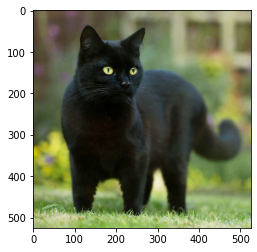

In [ ]:
# Load and display the image.
image = Image.open('black_cat.jpg')
plt.imshow(image)

In [ ]:
model = models.vgg16(pretrained = True) # Create an instance of VGG-16 neural network model, pretrained on the image dataset.
model.classifier[-1] # Select the last layer / the output layer of the classifier.

In [ ]:
# Resize the image (224 x 224 pixels), convert it into a pytorch tensor format and normalize it to [0, 1] range.
transform = transforms.Compose([transforms.Resize((224, 224)),
                                transforms.ToTensor(),
                                transforms.Normalize(mean = [0.485, 0.456, 0.406], std = [0.229, 0.224, 0.225])])

image = transform(image) # Transform the image.
print(image.shape)

torch.Size([3, 224, 224])


In [ ]:
image = image.unsqueeze(0) # Add an additional dimension '1' to the tensor, at index 0.
print(image.shape) # 1 x C x H x W format

torch.Size([1, 3, 224, 224])


In [ ]:
output = model(image) # Apply the model against the image.
print(output.shape)

torch.Size([1, 1000])


In [ ]:
output = output.squeeze(0) # Remove the dimension of size '1'.
print(output.shape)

torch.Size([1000])


In [ ]:
labels = json.load(open('imagenet_class_index.json')) # Load a JSON file that maps the class indices used by ImageNet dataset to the corresponding class label.
index = output.max(0) # Capture the maximum value and corresponding index, which represents the predicted class probabilities for the input image.
print(index)
print("----------------------------------")
index = str(index[1].item()) # Select the index of the max value.
print("Index / Position: ", index)

label = labels[index][1] # Capture the corresponding label of the index.
print("Label: ", label)

torch.return_types.max(
values=tensor(12.9788, grad_fn=<MaxBackward0>),
indices=tensor(285))
----------------------------------
Index / Position:  285
Label:  Egyptian_cat


In [ ]:
layers_list = list(model.features.modules()) # Extract the entire list of model's layers.
print(model.features)

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (17): Conv2d(256, 512, kernel_si

In [ ]:
outputs = []
names = []

# Iterate over all the layers, starting from the second layer.
for layer in layers_list[1:]:
    image = layer(image) # Apply the current layer against the image.
    outputs.append(image) # Append the feature map of the current layer.
    names.append(str(layer)) # Append the name of the layer and convert it to a string.

In [ ]:
# Iterate through the list of the feature maps. 
for feature_map in outputs:
    print(feature_map.shape)

torch.Size([1, 64, 224, 224])
torch.Size([1, 64, 224, 224])
torch.Size([1, 64, 224, 224])
torch.Size([1, 64, 224, 224])
torch.Size([1, 64, 112, 112])
torch.Size([1, 128, 112, 112])
torch.Size([1, 128, 112, 112])
torch.Size([1, 128, 112, 112])
torch.Size([1, 128, 112, 112])
torch.Size([1, 128, 56, 56])
torch.Size([1, 256, 56, 56])
torch.Size([1, 256, 56, 56])
torch.Size([1, 256, 56, 56])
torch.Size([1, 256, 56, 56])
torch.Size([1, 256, 56, 56])
torch.Size([1, 256, 56, 56])
torch.Size([1, 256, 28, 28])
torch.Size([1, 512, 28, 28])
torch.Size([1, 512, 28, 28])
torch.Size([1, 512, 28, 28])
torch.Size([1, 512, 28, 28])
torch.Size([1, 512, 28, 28])
torch.Size([1, 512, 28, 28])
torch.Size([1, 512, 14, 14])
torch.Size([1, 512, 14, 14])
torch.Size([1, 512, 14, 14])
torch.Size([1, 512, 14, 14])
torch.Size([1, 512, 14, 14])
torch.Size([1, 512, 14, 14])
torch.Size([1, 512, 14, 14])
torch.Size([1, 512, 7, 7])


In [ ]:
# Process the feature maps, by converting them to grayscale and reducing the dimension from 3D to 2D.
processed = []

for feature_map in outputs:
    feature_map = feature_map.squeeze(0) # Remove the batch dimension from feature map.
    gray_scale = torch.sum(feature_map, 0) # Sum of the feature map accross all channels.
    gray_scale = gray_scale/feature_map.shape[0] # Normalize the grayscale image.
    processed.append(gray_scale.data.cpu().numpy()) # Convert the image to a numpy array.

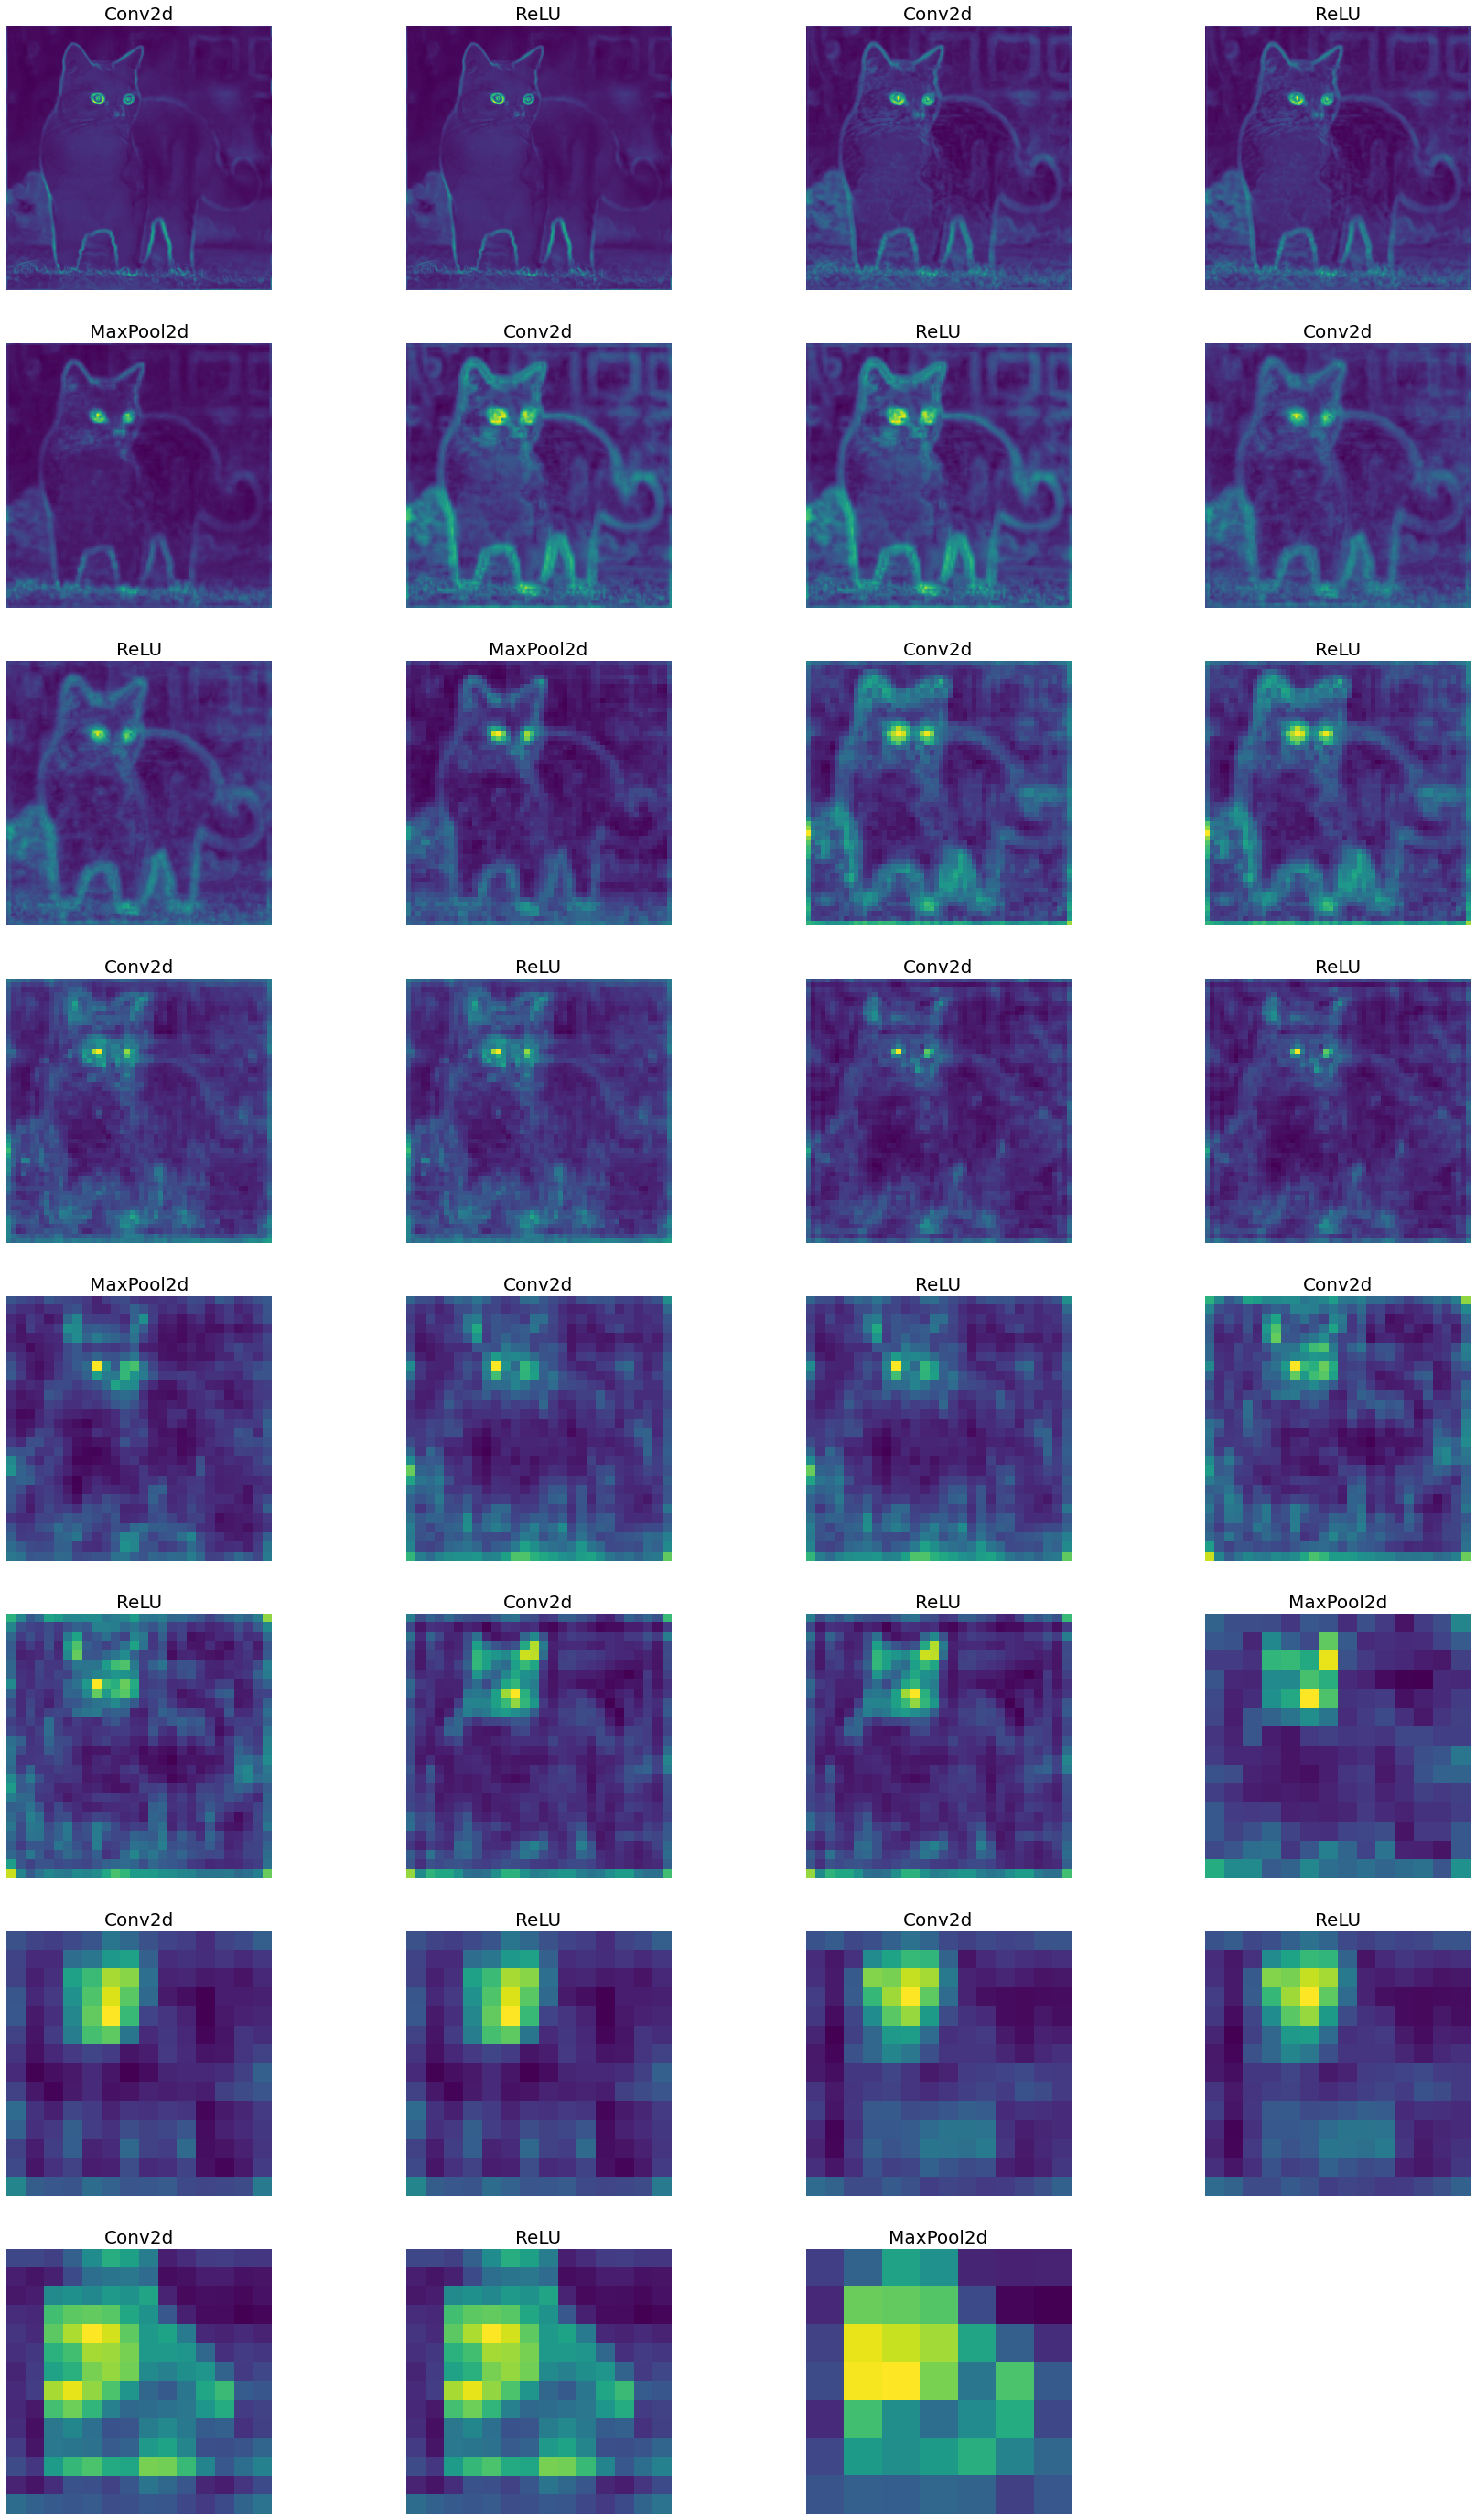

In [ ]:
fig = plt.figure(figsize = (30, 50))

# Iterate through all the processed images.
for i in range(len(processed)):
    a = fig.add_subplot(8, 4, i + 1) # Create a grid of 8 rows and 4 columns.
    imgplot = plt.imshow(processed[i]) # Display image.
    plt.axis('off')
    a.set_title(names[i].split('(')[0], fontsize = 20)